In [3]:
import numpy as np
import billiard_library as gbc

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [4]:
fpath = "../newdat/bumps_by_r/"

img_path_ = "../../AllWriteUps/Thesis/imgs/"

P_stacks = np.load(fpath + "p_mats.npy", allow_pickle=False)
Keys = np.load(fpath + "keys.npy", allow_pickle=False)
theta_partition = np.load(fpath + "theta_partition.npy", allow_pickle=False)

In [5]:
cut, rad = 50000, 1/2
cha_obs = lambda x: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)
F = np.array([cha_obs(x) for x in theta_partition])

In [6]:
radius_list = Keys[:,0]
k_list = 1/radius_list

In [7]:
index = 4
n_range = np.arange(1,50)

In [8]:
# choose P according to index
P = P_stacks[index]

In [9]:
#---make list of solutions G---#
var_est_list, g_list = [], []

In [10]:
for i in n_range:
    v, g, a = gbc.galerkin_var(P, F, theta_partition, galerkinN_= i+1)
    var_est_list.append(v)
    g_list.append(g)

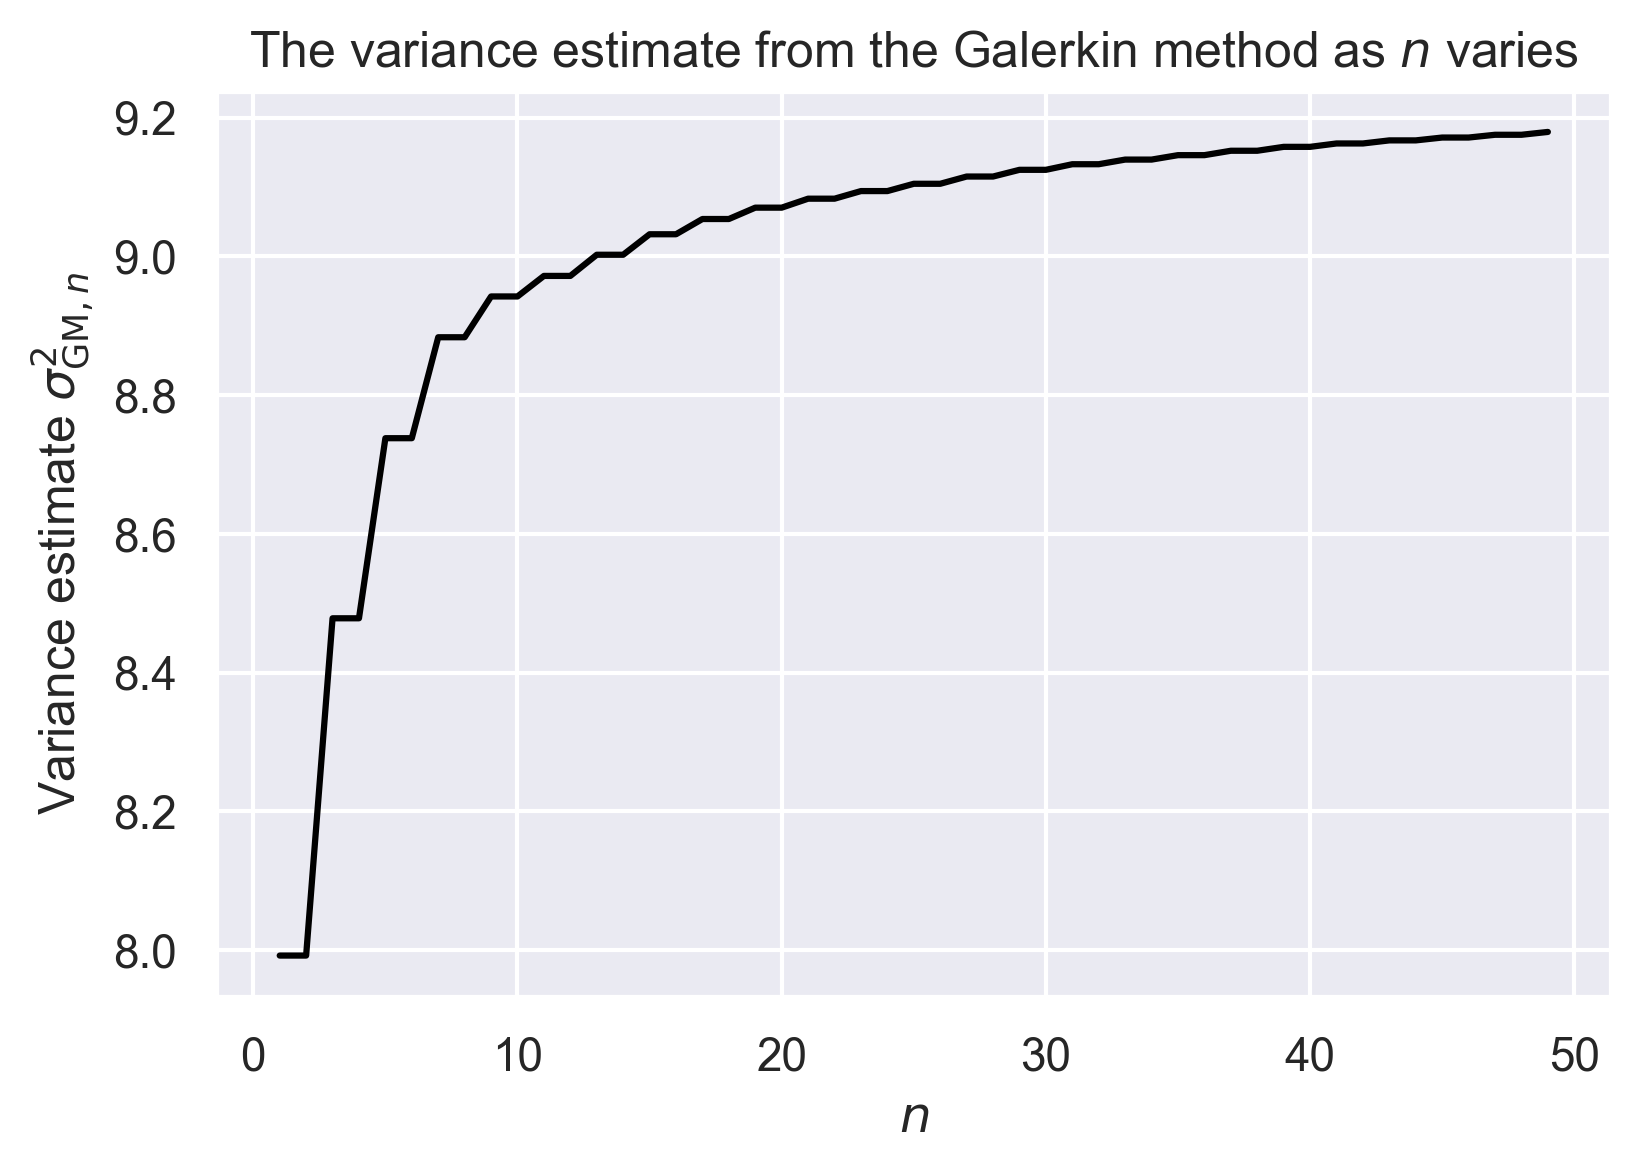

In [11]:
plt.plot(
    n_range, var_est_list,
    color="black"
)
plt.xlabel(r"$n$")
plt.ylabel(r"Variance estimate $\sigma^2_{{\mathrm{GM}}, n}$")
plt.title(r"The variance estimate from the Galerkin method as $n$ varies")
#plt.savefig(filename=img_path_+"galerkin_variance.eps")
plt.show()

In [12]:
converge_var = var_est_list[-1]

In [13]:
var_est_list = np.array(var_est_list)

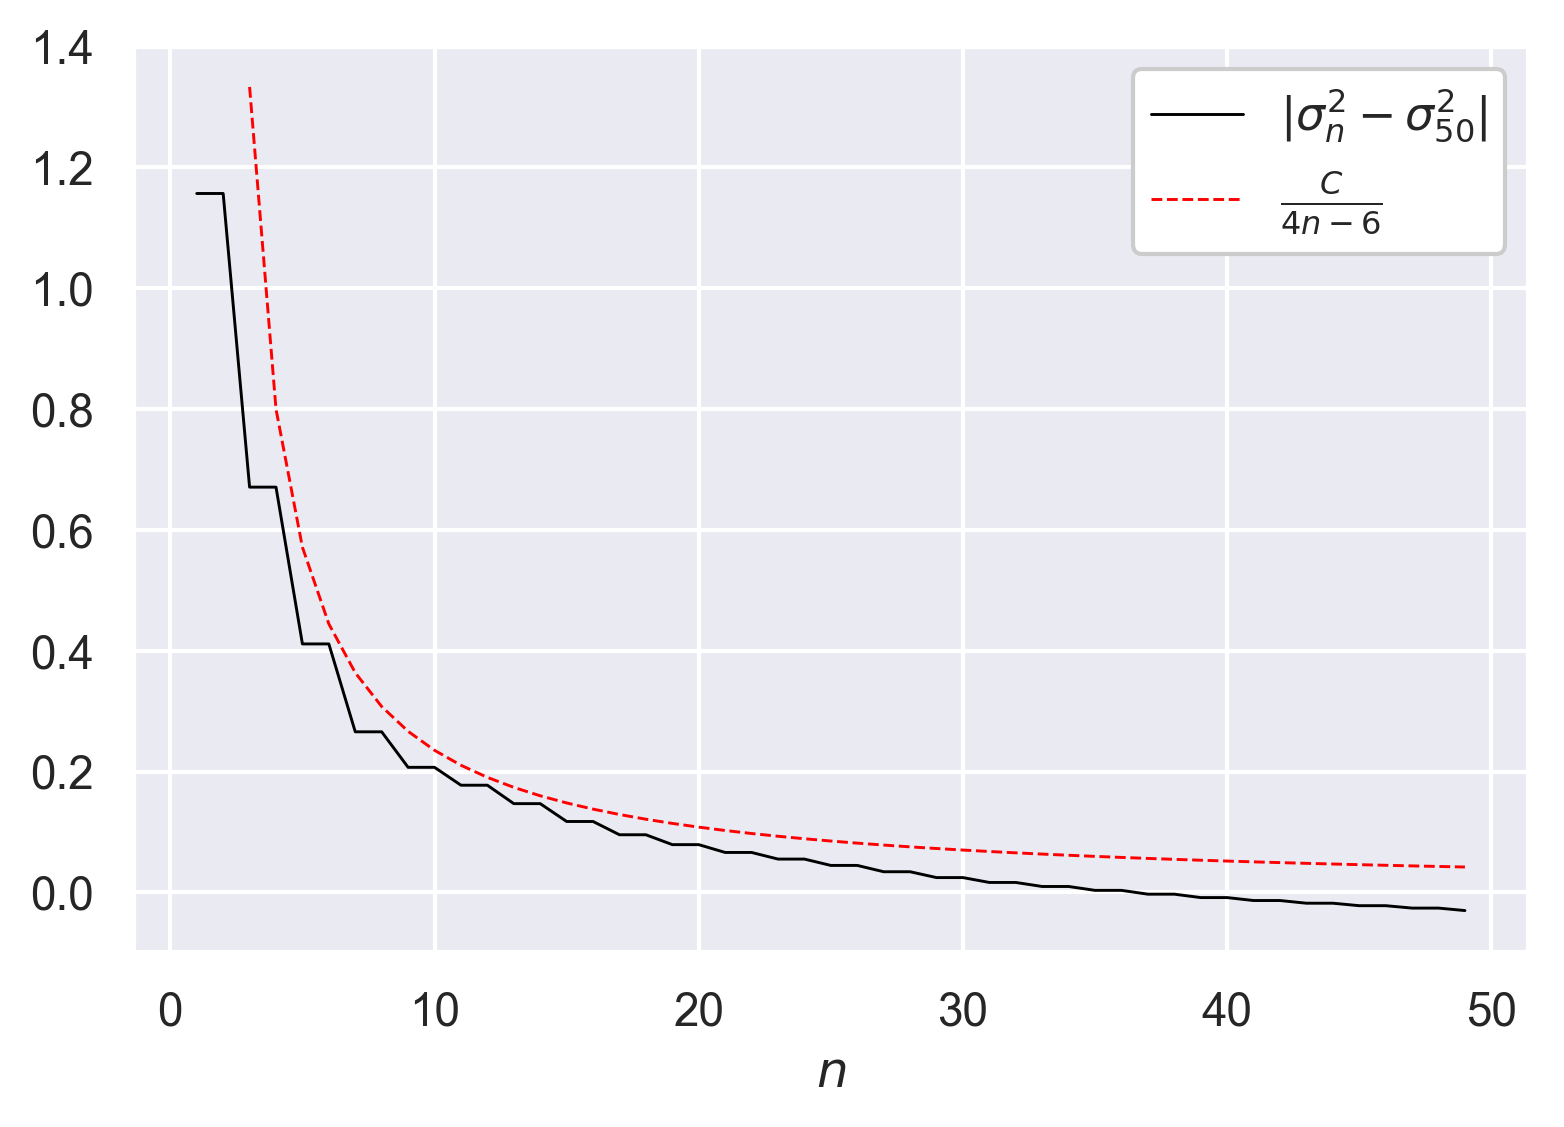

In [12]:
### FOR DEFENSE ###

plt.plot(
    n_range,
    np.abs(var_est_list-converge_var),
    label=r"$|\sigma^2_{ n}-\sigma^2_{50}|$",
    color="black",
    lw=0.7
)

plt.plot(
    n_range[2:],
    8/(4*n_range-6)[2:],
    label=r"$\frac{C}{4n-6}$",
    color="red",
    ls="--",
    lw=0.7
)

plt.xlabel(r"$n$")
#plt.title("Convergence rate of the variance estimate using the Galerkin method solution")
plt.legend(facecolor='white', framealpha=1)
#plt.savefig(filename=img_path_+"defense_galerkin_variance_rate.eps")
plt.show()

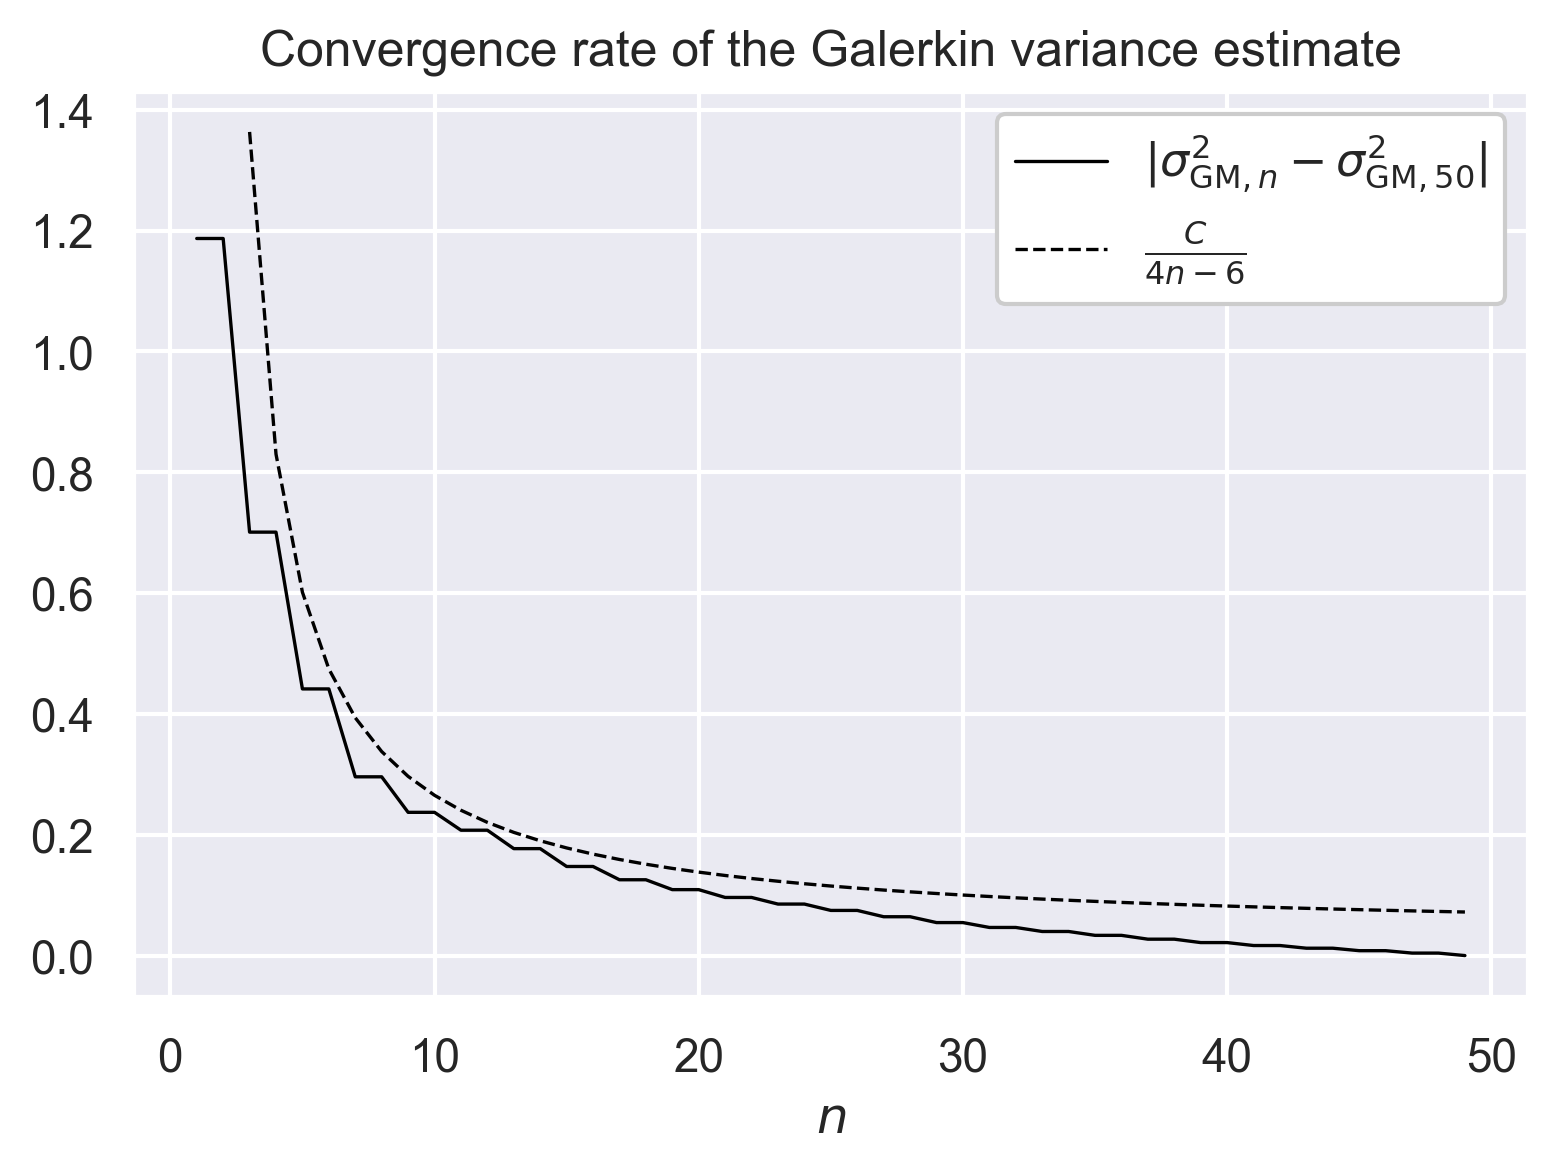

In [14]:
#---plot differences
plt.plot(
    n_range,
    np.abs(var_est_list-converge_var),
    label=r"$|\sigma^2_{{\mathrm{GM}}, n}-\sigma^2_{{\mathrm{GM}}, 50}|$",
    color="black",
    lw=0.8
)

plt.plot(
    n_range[2:],
    8/(4*n_range-6)[2:],
    label=r"$\frac{C}{4n-6}$",
    color="black",
    ls="--",
    lw=0.8
)

plt.xlabel(r"$n$")
plt.title("Convergence rate of the Galerkin variance estimate")
plt.legend(facecolor='white', framealpha=1)
plt.savefig(filename=img_path_+"galerkin_variance_rate.eps")
plt.show()